# SVM - Support Vector Machines
It is a supervised learning machine learning classification algorithm that has become extremely popular nowadays owing to its extremely efficient results.

An SVM is implemented in a slightly different way than other machine learning algorithms. It is capable of performing classification, regression and outlier detection.

Support Vector Machine is a discriminative classifier that is formally designed by a separative hyperplane. It is a representation of examples as points in space that are mapped so that the points of different categories are separated by a gap as wide as possible. In addition to this, an SVM can also perform non-linear classification. Let us take a look at how the Support Vector Machine work.

## How Does SVM Work?
The main objective of a support vector machine is to segregate the given data in the best possible way. When the segregation is done, the distance between the nearest points is known as the margin. The approach is to select a hyperplane with the maximum possible margin between the support vectors in the given data-sets.

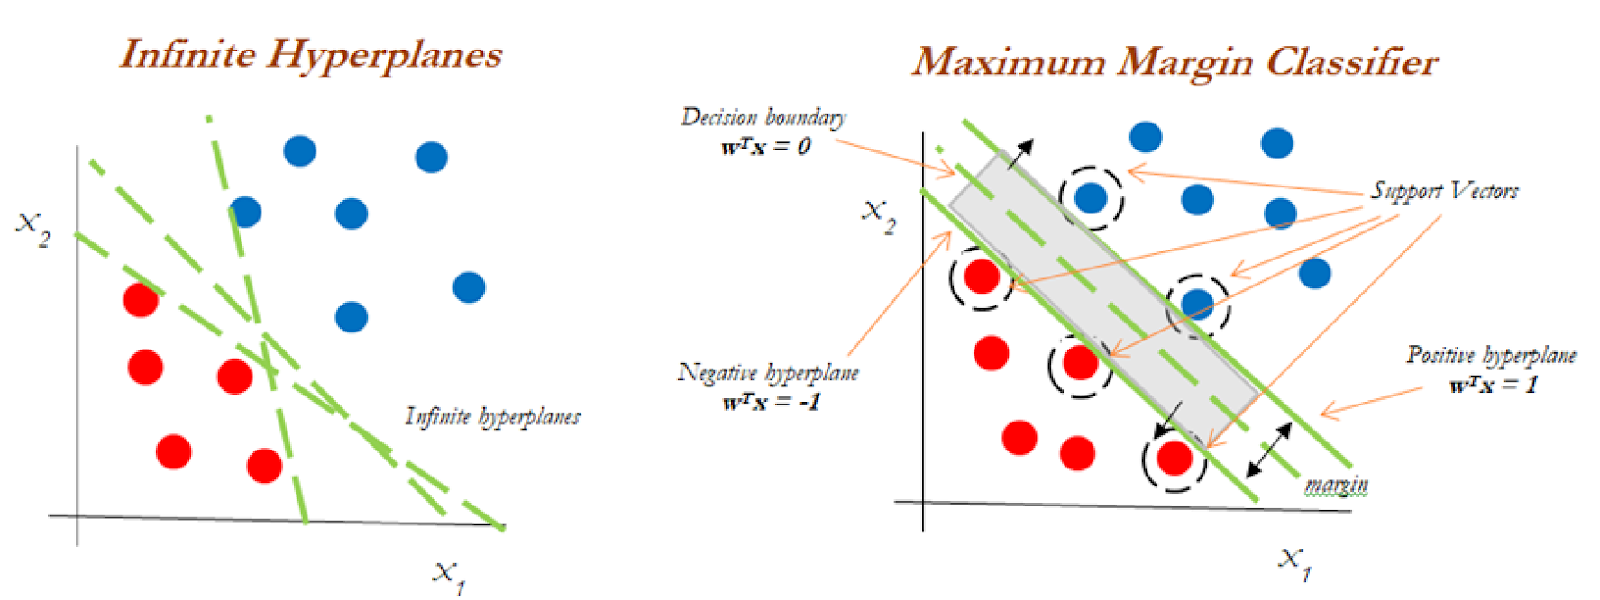

##  SVM Kernels
An SVM kernel basically adds more dimensions to a low dimensional space to make it easier to segregate the data. It converts the inseparable problem to separable problems by adding more dimensions using the kernel trick. A support vector machine is implemented in practice by a kernel. The kernel trick helps to make a more accurate classifier. Let us take a look at the different kernels in the Support vector machine.

**Linear Kernel** – A linear kernel can be used as a normal dot product between any two given observations. The product between the two vectors is the sum of the multiplication of each pair of input values.

**Polynomial Kernel** – It is a rather generalized form of the linear kernel. It can distinguish curved or nonlinear input space. Following is the polynomial kernel equation.
polynomial kernel 

**Radial Basis Function Kernel** – The radial basis function kernel is commonly used in SVM classification, it can map the space in infinite dimensions. Following is the RBF kernel equation.

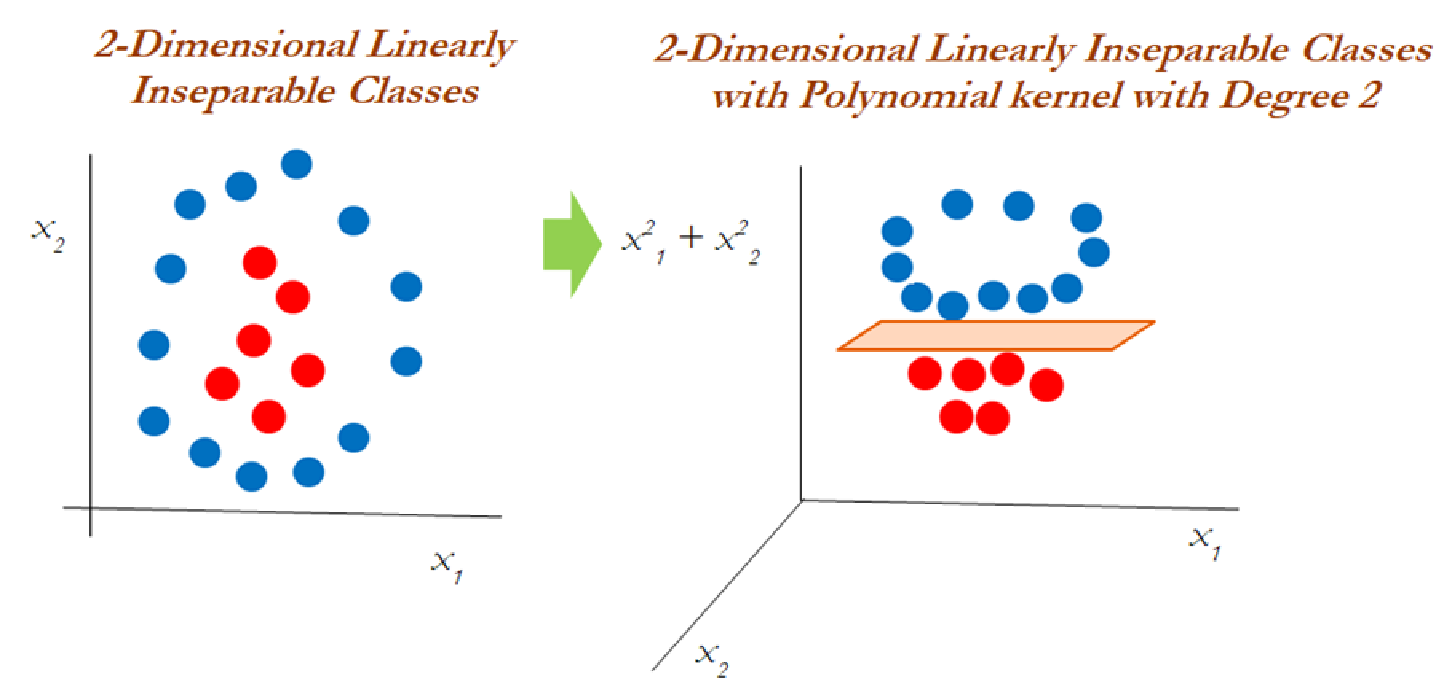

# SVM Using SKLearn
## Import Libraries
**Import pandas,plotly, and the usual libraries.**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# The data set:
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

For each record in the dataset it is provided:
- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.

In [ ]:
ha_df = pd.read_csv('/content/sample_data/human_activity.csv')

FileNotFoundError: ignored

In [ ]:
ha_df.head()

In [ ]:
print("Any missing sample in the df:",ha_df.isnull().values.any())


In [ ]:
#remove the subject column
ha_df.drop('subject', axis=1, inplace=True)

# EDA

**3. Frequency Distribution of the Outome.**

In [ ]:
counts = ha_df.Activity.value_counts()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=counts.index, values=counts))
fig.update_traces(hoverinfo='label+percent', textinfo='label+value+percent', textfont_size=10,
                  marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(
    height=800,
    width=700
)
fig.show()

##Feature Selection

In [ ]:
corr_df = ha_df.corr()
corr_df

In [ ]:
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap"
})

In [ ]:
cols = corr_df.columns.to_list()
for i in range(len(cols)):
  print(cols[i], ': ', end=' ')
  for j in range(len(cols)):
    if abs(corr_df.iloc[i,j]) >= 0.85 and cols[i] is not cols[j] :
      print(cols[j], end=', ')
  print()

In [ ]:
#too complicated to do in short time

In [ ]:
X = ha_df.drop('Activity', axis=1)
y = ha_df.Activity

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)
y = pd.Series(y, name='Activity', index = ha_df.Activity.index)
y


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi_selector = SelectKBest(chi2, k=50)
chi_selector.fit(X_scaled, y)
scores = pd.Series(chi_selector.scores_.tolist()) 
p_values = pd.Series(chi_selector.pvalues_.tolist()) 
selected_df = pd.DataFrame({'univariate_score':scores, 'p_values':p_values})
selected_df.set_index(X.columns, inplace=True, drop=True)
univariate = selected_df.sort_values(by='univariate_score', ascending=False)
univariate

In [ ]:
dropped = univariate[univariate.p_values>=0.05].index.to_list()
dropped

In [ ]:
X_scaled.drop(dropped, axis=1, inplace=True)
y = ha_df.Activity

In [ ]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=4321)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)

In [ ]:
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(y_train)
y_train_n = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
y_test_n = encoder.transform(y_test)
print(y_test[0:5].to_list())
print(y_test_n[0:5])

# Using The SVM Model

**Import svm from scikit learn.**

In [ ]:
from sklearn import svm

**Create a classifier: a support vector classifier**

In [ ]:
linearCls = svm.SVC().set_params(kernel='linear')
polyCls = svm.SVC().set_params(kernel='poly')
rbfCls = svm.SVC().set_params(kernel='rbf')


**Fit the models to the training data.**

In [ ]:
linearCls.fit(X_train, y_train_n)
polyCls.fit(X_train, y_train_n)
rbfCls.fit(X_train, y_train_n)

# Predictions and Evaluations
Let's evaluate our models!

**Use the predict method to predict values using your KNN model and X_test.**

In [ ]:
linPred = linearCls.predict(X_test)
polyPred = polyCls.predict(X_test)
rbfPred = rbfCls.predict(X_test)

#reverse back to labels
linPred = list(encoder.inverse_transform(linPred))
polyPred = list(encoder.inverse_transform(polyPred))
rbfPred = list(encoder.inverse_transform(rbfPred))


**10. print a confusion matrix and a classification report.**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,linPred))
print("\n")
print(classification_report(y_test, linPred))

In [ ]:
print(confusion_matrix(y_test,polyPred))
print("\n")
print(classification_report(y_test, polyPred))

In [ ]:
print(confusion_matrix(y_test,rbfPred))
print("\n")
print(classification_report(y_test, rbfPred))

# End.